## Most frequent words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [3]:
# read the data
with open("../data/reliable_news", "r") as reliable_file:
    rel = [line for line in reliable_file]
with open("../data/fake_news", "r") as fake_file:
    fake = [line for line in fake_file]

In [4]:
# make a word matrix, filter stopwords
cv = CountVectorizer(stop_words=stopwords.words("english"),\
                     lowercase=True)
word_matrix = cv.fit_transform(fake+rel)

In [18]:
# count word frequency: the goal is to specify additional stop-words
word_frequency = word_matrix.sum(axis=0)
inv_vocab = {v: k for k, v in cv.vocabulary_.items()}

# because we specify the stop-words manually, we only consider the first 50 word
for i in range(50):
    print(str(inv_vocab[word_frequency.argmax()])+": "+str(word_frequency.max()))
    word_frequency[0, word_frequency.argmax()] = 0

said: 288714
one: 243357
trump: 210444
people: 204452
new: 195937
would: 193453
also: 174696
blockchain: 165557
time: 150645
two: 149476
year: 148479
like: 145384
us: 143047
next: 140128
first: 136546
com: 132750
world: 119658
state: 117949
president: 116161
many: 113357
news: 112898
government: 111394
could: 108779
even: 108600
years: 108548
may: 106646
2016: 105752
market: 104250
get: 99621
think: 97837
last: 96934
stocks: 96275
day: 90104
make: 89846
headline: 86753
bitcoin: 86663
see: 85099
back: 84739
well: 84615
source: 84509
searches: 83527
exceed: 83253
way: 81917
right: 80520
states: 80100
http: 78226
know: 76665
obama: 76211
much: 75783
10: 73453


**Conclusion:** it's hard to tell, which words will be useful for the neural network, and which won't.
We'll come back here later.

## Texts' length statistic

In [49]:
from training_preprocess import sequence_vectorize
import matplotlib.pyplot as plt

In [41]:
# we examine the texts sizes, because later we need fix length sequences
# and we want to determine witch size we should padding or truncateing the files 
lengths = [len(i.split()) for i in fake+rel]

# make a sorted dict to help visualize the text lengths
length_dict = {i: lengths.count(i) for i in set(lengths)}
sorted_dict = {i[0]:i[1] for i in sorted(length_dict.items(), key=lambda kv: kv[0])}

[0, 1500, 0, 2500]

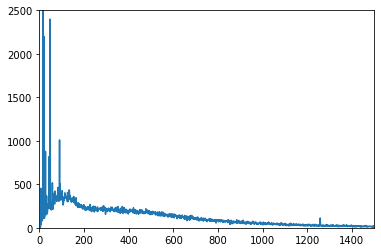

In [51]:
# plot the text lengths
plt.plot(list(sorted_dict.keys()), list(sorted_dict.values()))
plt.axis([0,1500,0,2500])


**Conclusion:** from the plot we can see, that most of the texts are shorter than 1000-1200 words. We should chose this interval, and optimize the length for the project.